### Machine Learning On Cnacer Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer_d = pd.read_csv('Dataset02-Breast_Cancer_2617.csv')
cancer_d.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancer_d.drop(columns=['id','Unnamed: 32'],axis = 1, inplace = True) 
cancer_d.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Check Multicollinearity: Corelation among the independent features

#### Independent Variables

In [4]:
independent_var = cancer_d.drop(['diagnosis'], axis = 1)
independent_var.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Correlation Matrix

In [5]:
corr_matrix = independent_var.corr()
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Text(0.5, 1.0, 'Correlation Heatmap')

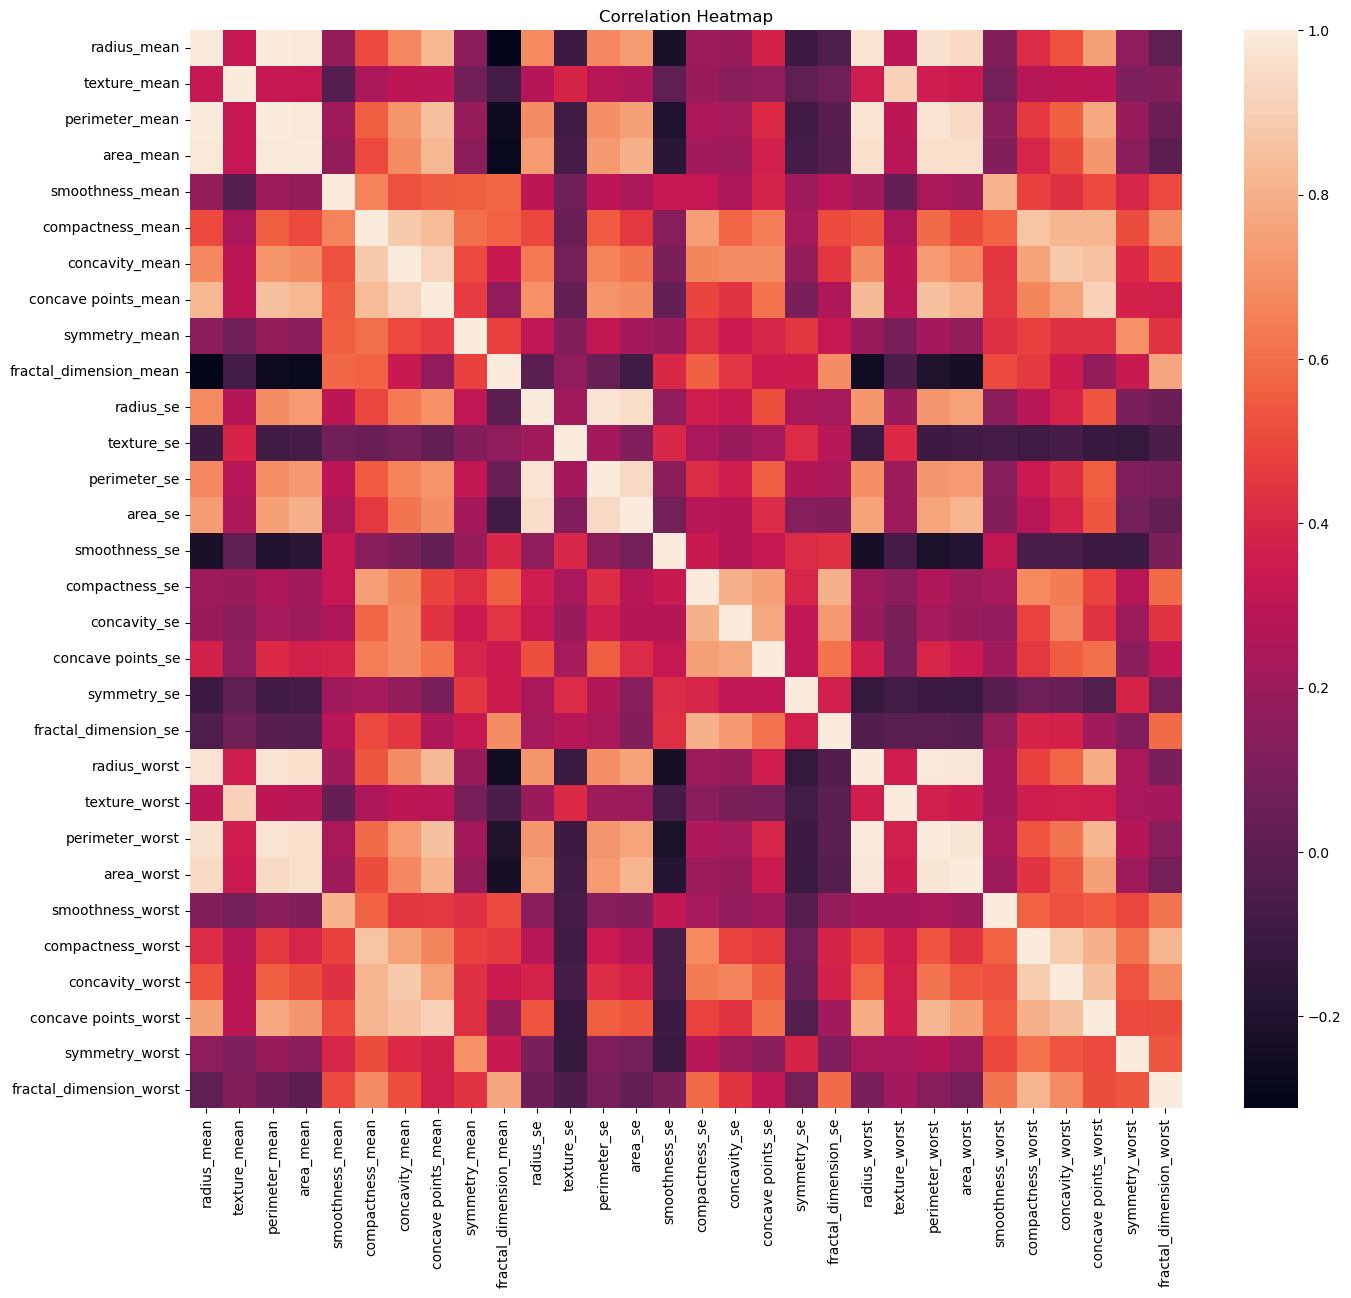

In [6]:
plt.figure(figsize=(16, 14))
heatmap = sns.heatmap(corr_matrix)
heatmap.set_title('Correlation Heatmap')

#### Converting the target varoiable into numeric variable
- M = 1
- B = 0

In [7]:
cancer_d['diagnosis'] = cancer_d['diagnosis'].apply(lambda x : 1 if x == 'M' else 0)
cancer_d.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


 #### x,y variable

In [8]:
x = cancer_d.drop('diagnosis', axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y = cancer_d['diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

#### Feature Scalling

In [10]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [11]:
x_scaled = std_scaler.fit_transform(x)
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### Splitting the data into Training and Testing data

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y , test_size = 0.2, random_state = 42)

#### Model Bulding

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#### Evulation Matrix

In [14]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 

### 1. Logistic Regressio  Model:

In [15]:
print("Logistic Regression")
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train) # training
y_pred_lr = lr_model.predict(x_test)
print('Classification Report')
print(classification_report (y_test, y_pred_lr ))

Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### 2. Decision Tree Model:

In [16]:
print("Decision Tree")
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train) # training
y_pred_dt = dt_model.predict(x_test)
print('Classification Report')
print(classification_report (y_test, y_pred_dt ))

Decision Tree
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### 3. Random Forest Model:

In [17]:
print("Random Forest")
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train) # training
y_pred_rf = rf_model.predict(x_test)
print('Classification Report')
print(classification_report (y_test, y_pred_rf ))

Random Forest
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### 4. K- Nearest Neighbors Classifier Model:

In [18]:
print("K-NN")
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train) # training
y_pred_knn = knn_model.predict(x_test)
print('Classification Report')
print(classification_report (y_test, y_pred_knn ))

K-NN
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### 5. Support Vector Machine:

In [19]:
print("Support Vector Machine")
svm_model = SVC()
svm_model.fit(x_train, y_train) # training
y_pred_svm = svm_model.predict(x_test)
print('Classification Report')
print(classification_report (y_test, y_pred_svm ))

Support Vector Machine
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### 6. Naive Bayes 

In [20]:
print("Naive Bayes")
nb_model = GaussianNB()
nb_model.fit(x_train, y_train) # training
y_pred_nb = svm_model.predict(x_test)
print('Classification Report')
print(classification_report (y_test, y_pred_nb ))

Naive Bayes
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
features = x_scaled
labels = y

#### Logistic Regression

In [23]:
list_of_acc = cross_val_score(lr_model, features, labels, scoring = 'accuracy',cv = 10)
print(list_of_acc)
avg_acc_model = list_of_acc.mean()
print('Avg of accuracy is = ',round(avg_acc_model*100,2))

[0.98245614 0.98245614 0.98245614 0.96491228 0.98245614 0.98245614
 0.94736842 1.         1.         0.98214286]
Avg of accuracy is =  98.07


#### Decision Tree

In [24]:
list_of_acc = cross_val_score(dt_model, features, labels, scoring = 'accuracy',cv = 10)
print(list_of_acc)
avg_acc_model = list_of_acc.mean()
print('Avg of accuracy is = ',round(avg_acc_model*100,2))

[0.92982456 0.85964912 0.92982456 0.87719298 0.96491228 0.87719298
 0.89473684 0.94736842 0.9122807  0.94642857]
Avg of accuracy is =  91.39


#### Random Forest

In [25]:
list_of_acc = cross_val_score(rf_model, features, labels, scoring = 'accuracy',cv = 10)
print(list_of_acc)
avg_acc_model = list_of_acc.mean()
print('Avg of accuracy is = ',round(avg_acc_model*100,2))

[0.98245614 0.87719298 0.94736842 0.94736842 1.         0.98245614
 0.94736842 0.98245614 0.94736842 0.98214286]
Avg of accuracy is =  95.96


#### K- Nearest - Neighabour

In [26]:
list_of_acc = cross_val_score(knn_model, features, labels, scoring = 'accuracy',cv = 10)
print(list_of_acc)
avg_acc_model = list_of_acc.mean()
print('Avg of accuracy is = ',round(avg_acc_model*100,2))

[0.98245614 0.96491228 0.92982456 0.98245614 1.         0.96491228
 0.94736842 0.96491228 0.94736842 0.98214286]
Avg of accuracy is =  96.66


#### Support Vector Machine

In [27]:
list_of_acc = cross_val_score(svm_model, features, labels, scoring = 'accuracy',cv = 10)
print(list_of_acc)
avg_acc_model = list_of_acc.mean()
print('Avg of accuracy is = ',round(avg_acc_model*100,2))

[0.98245614 0.96491228 0.94736842 0.98245614 1.         1.
 0.94736842 1.         1.         0.94642857]
Avg of accuracy is =  97.71


#### Naive Bayes

In [28]:
list_of_acc = cross_val_score(nb_model, features, labels, scoring = 'accuracy',cv = 10)
print(list_of_acc)
avg_acc_model = list_of_acc.mean()
print('Avg of accuracy is = ',round(avg_acc_model*100,2))

[0.94736842 0.87719298 0.89473684 0.92982456 0.92982456 0.98245614
 0.92982456 0.96491228 0.89473684 0.96428571]
Avg of accuracy is =  93.15
